In [7]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [8]:
df = pd.DataFrame(
    [
    [dt.datetime(2020, 1, 1),"A",40,100], 
    [dt.datetime(2020, 1, 3),"A",35,120], 
    [dt.datetime(2020, 1, 7),"A",38,89], 
    [dt.datetime(2020, 1, 8),"A",45,30], 
    [dt.datetime(2020, 1, 2),"B",1200,6], 
    [dt.datetime(2020, 1, 4),"B",3200,3], 
    [dt.datetime(2020, 1, 5),"B",2420,3],
    [dt.datetime(2020, 1, 8),"B",1050,15],
    ],
    columns=["date", "item_CD", "price", "num"]
)

In [9]:
df["sale"] = df["price"] * df["num"]

In [10]:
df

,date,item_CD,price,num,sale
0,2020-01-01,A,40,100,4000
1,2020-01-03,A,35,120,4200
2,2020-01-07,A,38,89,3382
3,2020-01-08,A,45,30,1350
4,2020-01-02,B,1200,6,7200
5,2020-01-04,B,3200,3,9600
6,2020-01-05,B,2420,3,7260
7,2020-01-08,B,1050,15,15750


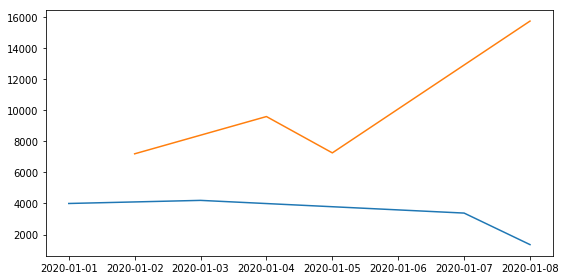

In [16]:
fig = plt.figure(figsize=(12,4))

for i in df["item_CD"].unique():
    plt.plot(
        df[df["item_CD"]==i]["date"],
        df[df["item_CD"]==i]["sale"]
    )

plt.tight_layout()

In [17]:
pd.date_range(start='2020/1/1', end='2020/1/8', freq='D')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08'],
              dtype='datetime64[ns]', freq='D')

In [28]:
template = pd.DataFrame(
    pd.date_range(start='2020/1/1', end='2020/1/8', freq='D'),
    columns=["date"]
)

template

,date
0,2020-01-01
1,2020-01-02
2,2020-01-03
3,2020-01-04
4,2020-01-05
5,2020-01-06
6,2020-01-07
7,2020-01-08


In [29]:
template["A"] = 0
template["B"] = 0
template

,date,A,B
0,2020-01-01,0,0
1,2020-01-02,0,0
2,2020-01-03,0,0
3,2020-01-04,0,0
4,2020-01-05,0,0
5,2020-01-06,0,0
6,2020-01-07,0,0
7,2020-01-08,0,0


In [30]:
template = pd.melt(template, id_vars=df.columns.values[:1], var_name="item_CD", value_name="delete")
template

,date,item_CD,delete
0,2020-01-01,A,0
1,2020-01-02,A,0
2,2020-01-03,A,0
3,2020-01-04,A,0
4,2020-01-05,A,0
5,2020-01-06,A,0
6,2020-01-07,A,0
7,2020-01-08,A,0
8,2020-01-01,B,0
9,2020-01-02,B,0


In [31]:
template = template[["date", "item_CD"]]
template

,date,item_CD
0,2020-01-01,A
1,2020-01-02,A
2,2020-01-03,A
3,2020-01-04,A
4,2020-01-05,A
5,2020-01-06,A
6,2020-01-07,A
7,2020-01-08,A
8,2020-01-01,B
9,2020-01-02,B


In [34]:
df["key"] = df["date"].astype(str).str.cat(df["item_CD"], sep='-')
df

,date,item_CD,price,num,sale,key
0,2020-01-01,A,40,100,4000,2020-01-01-A
1,2020-01-03,A,35,120,4200,2020-01-03-A
2,2020-01-07,A,38,89,3382,2020-01-07-A
3,2020-01-08,A,45,30,1350,2020-01-08-A
4,2020-01-02,B,1200,6,7200,2020-01-02-B
5,2020-01-04,B,3200,3,9600,2020-01-04-B
6,2020-01-05,B,2420,3,7260,2020-01-05-B
7,2020-01-08,B,1050,15,15750,2020-01-08-B


In [36]:
template["key"] = template["date"].astype(str).str.cat(template["item_CD"], sep='-')
template

,date,item_CD,key
0,2020-01-01,A,2020-01-01-A
1,2020-01-02,A,2020-01-02-A
2,2020-01-03,A,2020-01-03-A
3,2020-01-04,A,2020-01-04-A
4,2020-01-05,A,2020-01-05-A
5,2020-01-06,A,2020-01-06-A
6,2020-01-07,A,2020-01-07-A
7,2020-01-08,A,2020-01-08-A
8,2020-01-01,B,2020-01-01-B
9,2020-01-02,B,2020-01-02-B


In [43]:
df = pd.merge(template, df[["key", "price", "num", "sale"]], how="left", on="key")
df

,date,item_CD,key,price,num,sale
0,2020-01-01,A,2020-01-01-A,40.0,100.0,4000.0
1,2020-01-02,A,2020-01-02-A,NaN,NaN,NaN
2,2020-01-03,A,2020-01-03-A,35.0,120.0,4200.0
3,2020-01-04,A,2020-01-04-A,NaN,NaN,NaN
4,2020-01-05,A,2020-01-05-A,NaN,NaN,NaN
5,2020-01-06,A,2020-01-06-A,NaN,NaN,NaN
6,2020-01-07,A,2020-01-07-A,38.0,89.0,3382.0
7,2020-01-08,A,2020-01-08-A,45.0,30.0,1350.0
8,2020-01-01,B,2020-01-01-B,NaN,NaN,NaN
9,2020-01-02,B,2020-01-02-B,1200.0,6.0,7200.0


In [46]:
df = df.fillna(0)
df = df.drop("key", axis=1)
df

,date,item_CD,price,num,sale
0,2020-01-01,A,40.0,100.0,4000.0
1,2020-01-02,A,0.0,0.0,0.0
2,2020-01-03,A,35.0,120.0,4200.0
3,2020-01-04,A,0.0,0.0,0.0
4,2020-01-05,A,0.0,0.0,0.0
5,2020-01-06,A,0.0,0.0,0.0
6,2020-01-07,A,38.0,89.0,3382.0
7,2020-01-08,A,45.0,30.0,1350.0
8,2020-01-01,B,0.0,0.0,0.0
9,2020-01-02,B,1200.0,6.0,7200.0


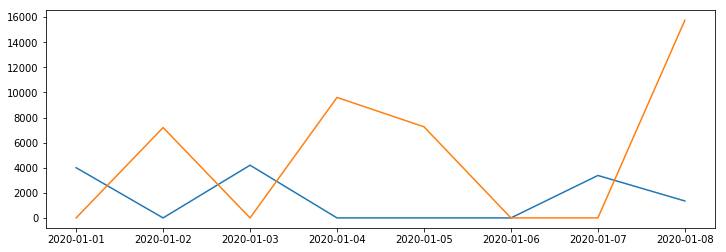

In [48]:
fig = plt.figure(figsize=(12,4))

for i in df["item_CD"].unique():
    plt.plot(
        df[df["item_CD"]==i]["date"],
        df[df["item_CD"]==i]["sale"]
    )